<a href="https://colab.research.google.com/github/SiYeon-Ju/Colab_work/blob/main/Cobrapy_OB3b_220610_fin_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !python --version
!pip install cobra==0.17.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 14.8 MB/s 
     |████████████████████████████████| 43.9 MB 1.8 MB/s 
     |████████████████████████████████| 2.3 MB 41.7 MB/s 
     |████████████████████████████████| 109 kB 51.8 MB/s 
     |████████████████████████████████| 147 kB 45.5 MB/s 
     |████████████████████████████████| 546 kB 46.6 MB/s 


In [ ]:
!git clone https://github.com/ensakz/gem_methylosinus_trichosporium.git

Cloning into 'gem_methylosinus_trichosporium'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 68 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [ ]:
#!pip install gurobipy ## 쓰지말 것,, 너무 Size가 작아서 못쓴다.. ##
# import gurobipy as gp
#model.solver = 'glpk'  # glpk 도 가능
# type(model.solver)

In [ ]:
import cobra
import pandas as pd
import numpy as np
## Json 모델 불러오기 ##
model_dir = r'/content/gem_methylosinus_trichosporium/model_files/iMsOB3b.json'
iMsOB3b = cobra.io.load_json_model(model_dir)

# lst = []
# for i in range(len(iMsOB3b.reactions)):
#   lst.append([iMsOB3b.reactions[i].id, iMsOB3b.reactions[i].reaction, iMsOB3b.reactions[i].name, 
#    iMsOB3b.reactions[i].lower_bound, iMsOB3b.reactions[i].upper_bound,  iMsOB3b.reactions[i].gene_reaction_rule])
# df = pd.DataFrame( lst, columns = ['ID', 'Rxn', 'Gene_name', 'LB','UB','Gene_Rxn_Rule'] )
# df.to_csv('Model_info.csv', header = True)
   
## SBML 모델 불러오기(예시) ##
#AM1_OB3b_combined=cobra.io.read_sbml_model(models_directory + "OB3b_draft_GEM_based_on_AM1_and_Bath_GEMs.xml")    


In [ ]:
def model_info(model): ## 모델 기본 정보 저장 ##
  lst = []
  for i in range(len(model.reactions)):
    lst.append([model.reactions[i].id, model.reactions[i].reaction, model.reactions[i].name, 
    model.reactions[i].lower_bound, model.reactions[i].upper_bound,  model.reactions[i].gene_reaction_rule])
  df = pd.DataFrame( lst, columns = ['ID', 'Rxn', 'Gene_name', 'LB','UB','Gene_Rxn_Rule'] )
  df.to_csv(str(model) + '_Model_info.csv', header = True)
  return print('Model_info save complete!')

model_info(iMsOB3b)

Model_info save complete!


In [ ]:
## 이렇게도 되네 ㅎㅎ
print('ID : ', iMsOB3b.reactions[1].id, '/ Rxn : ',iMsOB3b.reactions[1].reaction,'/ Name : ',iMsOB3b.reactions[1].name )
## 모델에서 반응 정보 뽑아내기 ##
print(iMsOB3b.reactions[1].lower_bound, iMsOB3b.reactions[1].upper_bound,  iMsOB3b.reactions[1].gene_reaction_rule)
iMsOB3b.reactions[1]

ID :  IMPC / Rxn :  fprica_c <=> h2o_c + imp_c / Name :  inosine monophosphate cyclohydrolase
-1000.0 1000.0 CQW49_01745


Reaction identifier,IMPC
Name,inosine monophosphate cyclohydrolase
Memory address,0x07fea8bdfa5d0
Stoichiometry,fprica_c <=> h2o_c + imp_c phosphoribosyl_formamido_carboxamide <=> H2O + IMP
GPR,CQW49_01745
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
## Adjust reaction bounds ## ## 모델의 Bounds 설정 ##
iMsOB3b.reactions.EX_ch4_e.bounds = (-14.9, 0)

In [ ]:
# Growth on molecular nitrogen:
# Check whether there is in silico growth rate using molecular nitrogen:
## 암모니아는 0으로 ##
iMsOB3b.reactions.EX_nh4_e.bounds = (0, 0)

# iMsOB3b.objective = 'Biomass_Mextorquens_AM1_core'
print('print objective in first context:', iMsOB3b.objective.expression)
iMsOB3b.summary()

#iMsOB3b.objective = 'Biomass_Mextorquens_AM1_core'



print objective in first context: 1.0*Biomass_Mextorquens_AM1_core - 1.0*Biomass_Mextorquens_AM1_core_reverse_8e834


In [ ]:
## 질소는 -1000으로.. ##
iMsOB3b.reactions.EX_n2_e.bounds = (-1000, 0 )  ## 튜플을 하든, 값을 두 개를 넣든 상관이 없다..  -1000, 0 그냥 이렇게만 써도 괜찮
iMsOB3b.summary()

In [ ]:
## 반응식 확인 ##
iMsOB3b.reactions.FALDA

Reaction identifier,FALDA
Name,H4F dependent formaldehyde activating
Memory address,0x07f99b93d05d0
Stoichiometry,fald_c + thf_c --> h2o_c + mlthf_c formaldehyde + tetrahydrofolate --> H2O + 5_10_methylenetetrahydrofolate
GPR,SP0001
Lower bound,0
Upper bound,0


In [ ]:
# Compare modes of methane oxidation after GAM/NGAM adjustments: NO3
# GAM: AM1, NGAM: Methylocystis parvus (default condition)
# create pandas dataframe to store results:
iMsOB3b.reactions.FALDA.bounds = (0, 0)         ## THF 관련 유전자
iMsOB3b.reactions.EX_nh4_e.bounds = (0, 0)      ## 암모니아 바운드 0
iMsOB3b.reactions.EX_n2_e.bounds = (0, 0)       ## 질소 바운드 0
iMsOB3b.reactions.EX_no3_e.bounds = (-1000, 0)  ## 질산 바운드 -inf

## 기록할 것 DataFrame으로 만들기 ##
import pandas as pd
df = pd.DataFrame(index=["Methane UTR","Oxygen UTR", "CO2 UTR", "NH4 UTR", "N2 UTR",
                         "NO3 UTR", "Uphill Electron Transfer Flux", "Growth Rate" ,
                         "Growth Yield", "O2/CH4 Ratio", "NH4/CH4 Ratio", "N2/CH4 Ratio",
                         "NO3/CH4 Ratio", "ATP/CH4 Ratio"])

## 기록할 것 DataFrame으로 만들기 ##
def df_record(solution, df, column):
    gr = solution.fluxes.Biomass_Mextorquens_AM1_core
    yx = gr/(abs((solution.fluxes.EX_ch4_e/1000)*16.04))  ## Growth Yeild ## Methan MW 16
    data = [solution.fluxes.EX_ch4_e, solution.fluxes.EX_o2_e, solution.fluxes.EX_co2_e, solution.fluxes.EX_nh4_e,
            solution.fluxes.EX_n2_e, solution.fluxes.EX_no3_e, solution.fluxes.UQCYOR_2p, gr, yx,
            solution.fluxes.EX_o2_e/solution.fluxes.EX_ch4_e, solution.fluxes.EX_nh4_e/solution.fluxes.EX_ch4_e,
            solution.fluxes.EX_n2_e/solution.fluxes.EX_ch4_e, solution.fluxes.EX_no3_e/solution.fluxes.EX_ch4_e,
            solution.fluxes.ATPS4rpp/abs(solution.fluxes.EX_ch4_e)]
    df[column] = data
    return df

In [ ]:
iMsOB3b.reactions.MEOHDH

Reaction identifier,MEOHDH
Name,methanol dehydrogenase
Memory address,0x07f99b9540f50
Stoichiometry,2.0 ficytc_c + meoh_p --> fald_p + 2.0 focytc_c + 2.0 h_p 2.0 oxidized_cytochrome_c + methanol --> formaldehyde + 2.0 reduced_cytochrome_c + 2.0 H_
GPR,(CQW49_14425 and CQW49_14440) or CQW49_14395
Lower bound,0.0
Upper bound,1000.0


In [ ]:
## 아래 코드 테스트 ## 두 개의 반응식이 이렇게 합쳐진다... 신기하다..
iMsOB3b.reactions.PMMOipp.flux_expression - 0.5*iMsOB3b.reactions.PMMODCipp.flux_expression

-0.5*PMMODCipp + 0.5*PMMODCipp_reverse_9fcf6 + 1.0*PMMOipp - 1.0*PMMOipp_reverse_b48b8

In [ ]:
# Direct coupling:
# Integrate redox arm and direct coupling with different ratios at the same time
import numpy as np
for r in np.arange(0,6.5,0.5): ## 0에서 6.0까지 0.5씩 올림
    with iMsOB3b as model:
        try:
            model.reactions.EX_no3_e.bounds = -1000, 0
            model.reactions.PMMOipp.bounds = 0, 1000     ## 메탄에서 메탄올 생성 반응식 (유비퀴논 이용)
            model.reactions.PMMODCipp.bounds = 0, 1000   ## 메탄에서 메탄올 생성 반응식 (Cytochrome 이용)
            c3 = model.problem.Constraint(
                    model.reactions.PMMOipp.flux_expression - 
                    r* model.reactions.PMMODCipp.flux_expression, lb=0, ub=0, name='c3')
            model.add_cons_vars(c3)
            solution = cobra.flux_analysis.pfba(model)
            print(round(solution.fluxes.MEOHDH,1),round(solution.fluxes.PMMODCipp,2), round(solution.fluxes.PMMOipp,2))
        except:
            #pass
            print(r, 'is infeasible')
    df = df_record(solution, df, 'NO3, pMMODC, RedEff {}'.format(r))
#There is a problem with pFBA when simulating via direct coupling mode of methane oxidation.

14.9 14.9 0.0
14.9 9.93 4.97
14.9 7.45 7.45
14.9 5.96 8.94
2.0 is infeasible
14.9 4.26 10.64
14.9 3.72 11.18
3.5 is infeasible
14.9 2.98 11.92
14.9 2.71 12.19
14.9 2.48 12.42
14.9 2.29 12.61
14.9 2.13 12.77


In [ ]:
## Parsimonas FBA 돌리기 ##
sol = cobra.flux_analysis.pfba(iMsOB3b)
#display(sol)
#print(sol.status)
#print(iMsOB3b.reactions)

lst = []
for rxn in sol.fluxes.index:
  try :
    rxn_cash = iMsOB3b.reactions.get_by_id(rxn)
    #print(rxn, rxn_cash.reaction)
    lst.append(rxn_cash.reaction)
  except:
    print('Error: Mismatch_'+str(rxn))
data1 = pd.DataFrame([sol.fluxes]).transpose().reset_index()
data2 = pd.DataFrame(lst, columns = ['Reaction'])
data3 = pd.concat([data1,data2], axis = 1)
data3.columns = [['ID', 'Flux', 'Reaction']]
data3.to_csv('results.csv')

In [ ]:
META_reactions = []
for reaction in iMsOB3b.reactions:
    if "META" in reaction.gene_reaction_rule:
        META_reactions.append(reaction)
META_reactions
iMsOB3b.reactions.PPND.gene_reaction_rule  ## 유전자 반응식 규칙에 META라고 명칭 붙는 것들이 있나보다..
## 위에걸 줄여서 GPR이라고 하는 듯...

### 여튼 반응식 출력하기 ###
iMsOB3b.reactions.PPND
### 아래처럼 하면  반응식 변경 ## 반응식 바꾸기 ###
# iMsOB3b.reactions.PPND.reaction = "ch4_p + o2_p + qh2_c --> h2o_p + meoh_p + q_c"

### 특정 대사물질(q_c)이 포함된 반응식을 모두 뽑아내는 방법 ###
for reaction in iMsOB3b.metabolites.q_c.reactions:
    print(reaction.name, reaction)

## bound 확인하는 법 ##
pgi = iMsOB3b.reactions.get_by_id("PGI")
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)
## bound 백업과 쉽게 바꾸는 방법 ##
old_bounds = pgi.bounds
pgi.bounds = (0, 1000.0)
## 역반응 확인 ##
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)
print("Reversibility after modification:", pgi.reversibility)
pgi.bounds = old_bounds
print("Reversibility after resetting:", pgi.reversibility)


### 반응식에 대사체 추가하기 ##
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
pgi.reaction

## mass balance 확인하기 
pgi.check_mass_balance()

## 반응식 바꾸기   반응식 변경
pgi.reaction = "g6p_c --> f6p_c + h_c + green_eggs + ham"
pgi.reaction  ## 확인하기도 가능

ETF dehydrogenase ETFDH: q_c + rETF_c <=> oxETF_c + qh2_c
particulate Methane Monooxygenase PMMOipp: ch4_p + o2_p + qh2_c --> h2o_p + meoh_p + q_c
NADH ubiquinone oxidoreductase I NADH11: 5.0 h_c + nadh_c + q_c --> 4.0 h_p + nad_c + qh2_c
QRr QRr: h_c + nadph_c + q_c --> nadp_c + qh2_c
cytochrome bd ubiquinol oxidase CYOD: 4.0 h_c + o2_c + 2.0 qh2_c --> 2.0 h2o_c + 4.0 h_p + 2.0 q_c
Nitrate reductase (Ubiquinol-8) NO3R1: no3_c + qh2_c --> h2o_c + no2_c + q_c
particulate ammonia monooxygenase PAMMOipp: nh4_p + o2_p + qh2_c --> h2o_p + h_p + ham_p + q_c
ubiquinol cytochrome c reductase UQCYOR_2p: 2.0 ficytc_c + qh2_c --> 2.0 focytc_c + 2.0 h_p + q_c
photosystem I cyclic PHOTOSYS1C: 2.0 fdxrd_c + 2.0 h_c + q_c --> 2.0 fdxox_c + qh2_c
succinate dehydrogenase SUCCD1: q_c + succ_c <=> fum_c + qh2_c
NADPH Quinone Reductase (Ubiquinone-8) NADPHQR2: h_c + nadph_c + q_c --> nadp_c + qh2_c
cytochrome o ubiquinol oxidase CYOO_4p: 4.0 h_c + 0.5 o2_c + qh2_c --> h2o_c + 4.0 h_p + q_c
-1000.0 < pgi <

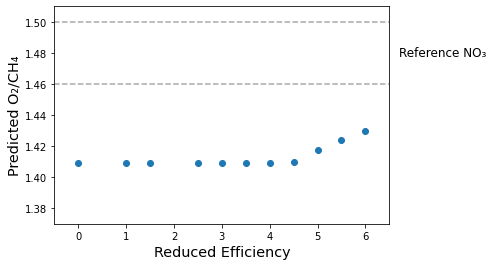

In [ ]:
df.at['O2/CH4 Ratio', 'NO3, pMMODC, RedEff 0.5'] = 0.00
df.at['O2/CH4 Ratio', 'NO3, pMMODC, RedEff 2.0'] = 0.00
df.iloc[9]['NO3, pMMODC, RedEff 0.0':'NO3, pMMODC, RedEff 6.0']
import matplotlib.pyplot as plt
import pandas

x=np.arange(0,6.5,0.5)
plt.scatter(x, y=df.iloc[9]['NO3, pMMODC, RedEff 0.0':'NO3, pMMODC, RedEff 6.0'])
plt.axhline(y=1.46, color='darkgray', linestyle='--')
plt.axhline(y=1.50, color='darkgray', linestyle='--')
plt.text(6.7, 1.478,'Reference NO\u2083', fontsize='large')
#plt.fill_between((-0.5, 6.5), 1.48, 1.50, facecolor = 'darkgray')
plt.xlim((-0.5,6.5))
plt.ylim((1.37,1.51))
plt.xlabel('Reduced Efficiency', fontsize='x-large')
plt.ylabel('Predicted O\u2082/CH\u2084', fontsize='x-large')
plt.show()

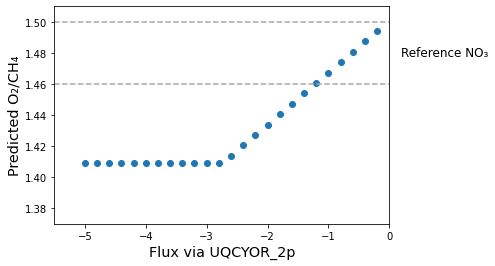

In [ ]:
# Uphill electron transfer:
# Iteratively limit the flux of reverse electron in uphill electron transfer mode

with iMsOB3b as model:
    model.reactions.UQCYOR_2p.bounds = -1000, 1000
    model.reactions.EX_no3_e.bounds = -1000, 0
    solution = cobra.flux_analysis.pfba(model)

df = df_record(solution, df, 'NO3, pMMO, Uphill Unconstrained')


for r in np.arange(-5,0,0.2):
    with iMsOB3b as model:
        model.reactions.UQCYOR_2p.bounds = r, 1000
        model.reactions.EX_no3_e.bounds = -1000, 0
        solution = cobra.flux_analysis.pfba(model)

    df = df_record(solution, df, 'NO3, pMMO, Uphill ET, {}'.format(r))

    
df.iloc[9]['NO3, pMMO, Uphill ET, -5.0':'NO3, pMMO, Uphill ET, -0.19999999999999574']


import matplotlib.pyplot as plt
import pandas

x=np.arange(-5,0,0.2)
plt.scatter(x, y=df.iloc[9]['NO3, pMMO, Uphill ET, -5.0':'NO3, pMMO, Uphill ET, -0.19999999999999574'])
plt.axhline(y=1.46, color='darkgray', linestyle='--')
plt.axhline(y=1.50, color='darkgray', linestyle='--')
plt.text(0.2, 1.478,'Reference NO\u2083', fontsize='large')
#plt.fill_between((-5.5,0), 1.48, 1.50, facecolor = 'darkgray')
plt.xlim((-5.5,0))
plt.ylim((1.37,1.51))
plt.xlabel('Flux via UQCYOR_2p', fontsize='x-large')
plt.ylabel('Predicted O\u2082/CH\u2084', fontsize='x-large')
plt.show()